In [68]:
import pandas as pd

In [69]:
cocacola=pd.read_csv("C:/Users/elcot/Downloads/CocaColaSalesRawdata.csv")

In [70]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [71]:
Quarter =['Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3'] 

In [72]:
import numpy as np

In [73]:
p = cocacola["Quarter"][0]

In [74]:
p[0:3]

'Q1_'

In [75]:
cocacola["Quarter"][0]

'Q1_86'

In [76]:
for i in range(42):
    p =cocacola ["Quarter"][i]
    cocacola['Quarter'][i]= p[0:3]

C:\Users\elcot\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(cocacola['Quarter']))

In [78]:
cocacola1 = pd.concat([cocacola,Quarter_dummies],axis = 1)

In [79]:
cocacola1["t"] = np.arange(1,43)

In [80]:
cocacola1["t_squared"] = cocacola1["t"]*cocacola1["t"]

In [81]:
cocacola1.columns

Index(['Quarter', 'Sales', 'Q1_', 'Q2_', 'Q3_', 'Q4_', 't', 't_squared'], dtype='object')

In [82]:
cocacola1["log_Sales"] = np.log(cocacola1["Sales"])

In [83]:
cocacola1.rename(columns={"Sales ": 'Sales'}, inplace=True)

In [84]:
import matplotlib.pyplot as plot

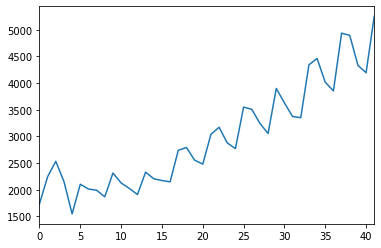

In [85]:
cocacola1.Sales.plot()

In [86]:
cocacola1.shape

(42, 9)

In [87]:
Train = cocacola1.head(32)

In [88]:
Test = cocacola1.tail(10)

In [89]:
import seaborn as sb

In [90]:
import statsmodels.formula.api as smf 

In [91]:
linear_model = smf.ols('Sales~t',data=Train).fit()

In [92]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [93]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))

In [94]:
rmse_linear

752.9233933232188

In [95]:
Exp = smf.ols('log_Sales~t',data=Train).fit()

In [96]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))

In [97]:
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

In [98]:
rmse_Exp

590.331643261282

In [99]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()

In [100]:
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))

In [101]:
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

In [102]:
rmse_Quad

457.7357355593606

In [103]:
add_sea = smf.ols('Sales ~ Q1_+Q2_+Q3_+Q4_',data=Train).fit()

In [104]:
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1_', 'Q2_', 'Q3_', 'Q4_', 't', 't_squared']]))

In [105]:
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

In [106]:
rmse_add_sea

1850.4665461690342

In [107]:
cocacola1.columns

Index(['Quarter', 'Sales', 'Q1_', 'Q2_', 'Q3_', 'Q4_', 't', 't_squared',
       'log_Sales'],
      dtype='object')

In [108]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1_+Q2_+Q3_+Q4_',data=Train).fit()

In [109]:
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1_','Q2_','Q3_','Q4_','t','t_squared']]))

In [110]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))

In [111]:
rmse_add_sea_quad

277.35107711476326

In [112]:
Mul_sea = smf.ols('log_Sales~t+t_squared+Q1_+Q2_+Q3_+Q4_',data = Train).fit()

In [113]:
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))

In [114]:
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))

In [115]:
rmse_Mult_sea

801.9777858128066

In [116]:
Mul_Add_sea = smf.ols('log_Sales~t+t_squared+Q1_+Q2_+Q3_+Q4_',data = Train).fit()

In [117]:
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))

In [118]:
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))

In [119]:
rmse_Mult_add_sea

801.9777858128066

In [120]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}

In [121]:
table_rmse=pd.DataFrame(data)

In [122]:
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,752.923393
1,rmse_Exp,590.331643
2,rmse_Quad,457.735736
3,rmse_add_sea,1850.466546
4,rmse_add_sea_quad,277.351077
5,rmse_Mult_sea,801.977786
6,rmse_Mult_add_sea,801.977786
